# RFM Analysis
### Main Goal
RFM segmentation is used to classify customers by how recently (Recency), how often (Frequency), and how much (Monetary) they buy. The goal is to identify loyal (high value) customers, casuals, and those at risk of leaving, so one can target marketing and offers efficiently

In [1]:
import ast
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df1 = pd.read_csv(r'C:\Users\lenovo\Documents\archive\Orders.csv')
df2 = pd.read_csv(r'C:\Users\lenovo\Documents\archive\Details.csv')

df = pd.merge(df1,df2,on='Order ID',how='inner')

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce')
df

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI
1,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card
2,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,443,11,1,Clothing,Saree,COD
3,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,57,7,2,Clothing,Shirt,UPI
4,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,227,48,5,Clothing,Stole,COD
...,...,...,...,...,...,...,...,...,...,...,...
1495,B-25742,2018-08-03,Ashwin,Goa,Goa,11,-8,2,Clothing,Skirt,UPI
1496,B-26088,2018-03-26,Bhavna,Sikkim,Gangtok,11,5,2,Clothing,Hankerchief,UPI
1497,B-25707,2018-07-01,Shivani,Maharashtra,Mumbai,8,-6,1,Clothing,Stole,COD
1498,B-25758,2018-08-22,Shubham,Himachal Pradesh,Simla,8,-2,1,Clothing,Stole,COD


In [ ]:
print(df.columns)

Index(['Order ID', 'Order Date', 'CustomerName', 'State', 'City', 'Amount',
       'Profit', 'Quantity', 'Category', 'Sub-Category', 'PaymentMode'],
      dtype='object')


In [4]:
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)
snapshot_date

Timestamp('2019-01-01 00:00:00')

In [12]:
recency = df.groupby('CustomerName')['Order Date'].max().apply(lambda x: (snapshot_date - x).days)

frequency = df.groupby('CustomerName')['Order ID'].nunique()

monetary = df.groupby('CustomerName')['Amount'].sum()


In [14]:
rfm = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})
rfm = rfm.reset_index()
rfm.head()


,CustomerName,Recency,Frequency,Monetary
0,Aakanksha,184,1,74
1,Aarushi,268,3,4701
2,Aastha,67,1,3276
3,Aayush,47,1,556
4,Aayushi,108,3,689


In [33]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 3, labels=['Recent', 'Moderate', 'Old'], duplicates='drop')
rfm['F_Score'] = pd.cut(rfm['Frequency'],bins=3, labels=['Low', 'Medium', 'High'], duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 3, labels=['Low', 'Medium', 'High'], duplicates='drop')


def segment(row):
    if row['R_Score'] == 'Recent' and row['F_Score'] == 'High' and row['M_Score'] == 'High':
        return 'Champions'
    elif row['R_Score'] == 'Recent' and row['F_Score'] == 'High':
        return 'Loyal Customers'
    elif row['R_Score'] == 'Moderate' and row['F_Score'] == 'High':
        return 'Potential Loyalist'
    elif row['R_Score'] == 'Old' and row['F_Score'] == 'Low':
        return 'At Risk'
    elif row['R_Score'] == 'Old':
        return 'Hibernating'
    elif row['M_Score'] == 'High':
        return 'High Spenders'
    elif row['F_Score'] == 'Medium':
        return 'Frequent'
    else:
        return 'Regular'

rfm['Segment'] = rfm.apply(segment, axis=1)

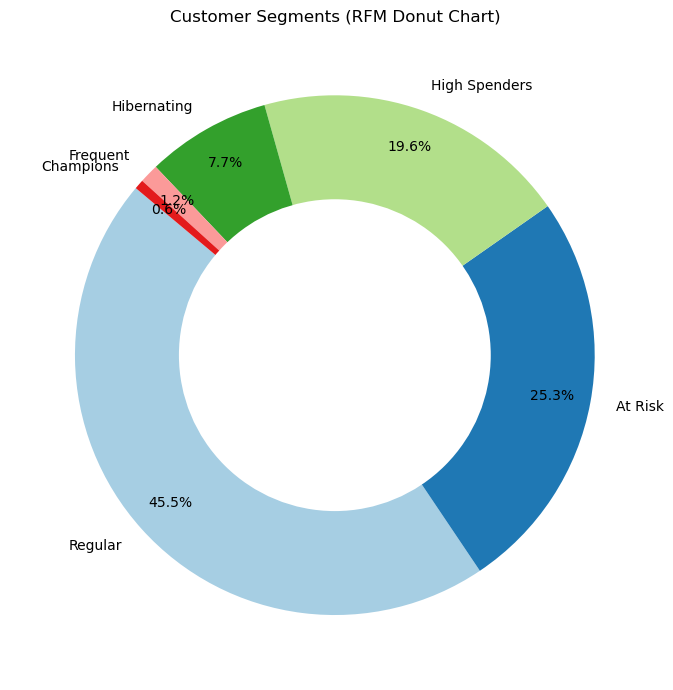

In [41]:
segment_counts = rfm['Segment'].value_counts()
colors = plt.cm.Paired.colors[:len(segment_counts)]

plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    segment_counts,
    labels=segment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=colors
)

# Draw donut (white circle in the middle)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Customer Segments (RFM Donut Chart)')
plt.tight_layout()
plt.show()